In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', delimiter=',', skipinitialspace=True, header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', delimiter=',', skipinitialspace=True, skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels


In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train_set.shape

(32561, 15)

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
for col in train_set.columns:
    train_set[col]=train_set[col].replace(0, np.nan)

In [7]:
train_set.isna().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain      29849
capital_loss      31042
hours_per_week        0
native_country        0
wage_class            0
dtype: int64

In [8]:
train_set.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

In [9]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [10]:
train_set['wage_class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [11]:
train_set['wage_class'] = np.where(train_set['wage_class']=='<=50K',0,1)

In [12]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
wage_class         int32
dtype: object

In [13]:
train_set['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
wrk = {'State-gov':0, 'Self-emp-not-inc':1, 'Private':2, 'Federal-gov':3, 'Local-gov':4, '?':5, 'Self-emp-inc':6, 'Without-pay':7,
      'Never-worked':8}
train_set['workclass'] = train_set['workclass'].map(wrk).astype(int)

In [15]:
train_set['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [16]:
train_set[['education','education_num']]

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [17]:
train_set.drop('education',axis=1,inplace=True)

In [18]:
train_set['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [19]:
train_set['marital_status']=train_set['marital_status'].map({'Married-civ-spouse':0, 'Never-married':1, 'Divorced':2,
'Separated':3, 'Widowed':4, 'Married-spouse-absent':5, 
'Married-AF-spouse':6}).astype(int)

In [20]:
train_set['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [21]:
occ = {'Adm-clerical':0,'Exec-managerial':1,'Handlers-cleaners':2,'Prof-specialty':3,
'Other-service':4,'Sales':5,'Craft-repair':6,'Transport-moving':7,
'Farming-fishing':8,'Machine-op-inspct':9,'Tech-support':10,'?':11,'Protective-serv':12,
'Armed-Forces':13,'Priv-house-serv':14,   
}

In [22]:
train_set['occupation'] = train_set['occupation'].map(occ).astype(int)

In [23]:
train_set['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [24]:
train_set['relationship'] = train_set['relationship'].map({'Not-in-family':0,'Husband':1,'Wife':2,'Own-child':3,'Unmarried':4,
                                                          'Other-relative':5}).astype(int)

In [25]:
train_set['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [26]:
train_set['race'] = train_set['race'].map({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,
       'Other':4}).astype(int)

In [27]:
train_set['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
train_set['sex'] = train_set['sex'].map({'Male':0,'Female':1})

In [29]:
train_set['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [30]:
train_set['native_country'] = train_set['native_country'].map({'?':0,'United-States':1, 'Mexico':2, 'Philippines':3,
'Germany':4, 'Canada':5, 'Puerto-Rico':6, 'El-Salvador':7, 
'India':8, 'Cuba':9, 'England':10,'Jamaica':11, 'South':12, 
'China':13, 'Italy':14, 'Dominican-Republic':15, 'Vietnam':16,
'Guatemala':17, 'Japan':18, 'Poland':19, 'Columbia':20, 'Taiwan':21,
'Haiti':22, 'Iran':23, 'Portugal':24, 'Nicaragua':25, 'Peru':26, 
'France':27, 'Greece':28, 'Ecuador':29, 'Ireland':30,'Hong':31,
'Trinadad&Tobago':32, 'Cambodia':33, 'Laos':34, 'Thailand':35, 
'Yugoslavia':36, 'Outlying-US(Guam-USVI-etc)':37, 'Hungary':38,
'Honduras':39, 'Scotland':40, 'Holand-Netherlands':41}).astype(int)

In [31]:
train_set.head()
    

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,39,0,77516,13,1,0,0,0,0,40,1,0
1,50,1,83311,13,0,1,1,0,0,13,1,0
2,38,2,215646,9,2,2,0,0,0,40,1,0
3,53,2,234721,7,0,2,1,1,0,40,1,0
4,28,2,338409,13,0,3,2,1,1,40,9,0


In [32]:
train_set['hours_per_week'].value_counts()


40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

In [33]:
train_set['hours_per_week'].astype(int)

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours_per_week, Length: 32561, dtype: int32

In [34]:
train_set.loc[train_set['hours_per_week'] < 40, 'hours_per_week'] = 0
train_set.loc[train_set['hours_per_week'] == 40, 'hours_per_week'] = 1
train_set.loc[train_set['hours_per_week'] > 40, 'hours_per_week'] = 2

In [35]:
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,39,0,77516,13,1,0,0,0,0,1,1,0
1,50,1,83311,13,0,1,1,0,0,0,1,0
2,38,2,215646,9,2,2,0,0,0,1,1,0
3,53,2,234721,7,0,2,1,1,0,1,1,0
4,28,2,338409,13,0,3,2,1,1,1,9,0


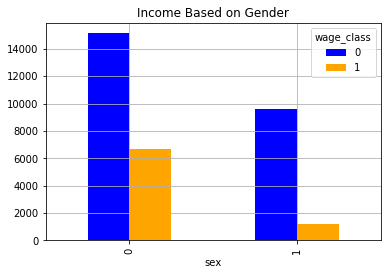

In [36]:
genderincom = pd.crosstab(train_set['sex'], train_set['wage_class'])
genderincom.plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Gender')

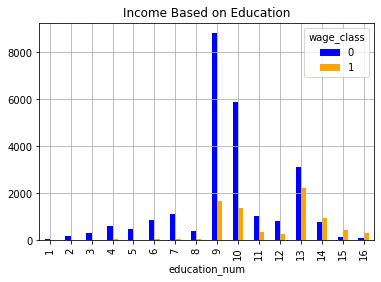

In [37]:
eduincome = pd.crosstab(train_set['education_num'], train_set['wage_class'])
eduincome.plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Education')

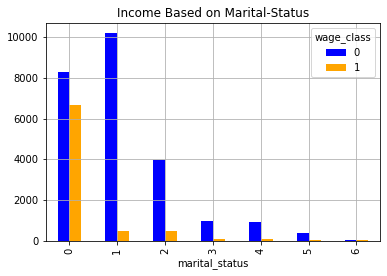

In [38]:
martialstatusincome = pd.crosstab(train_set['marital_status'], train_set['wage_class'])
martialstatusincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Marital-Status')

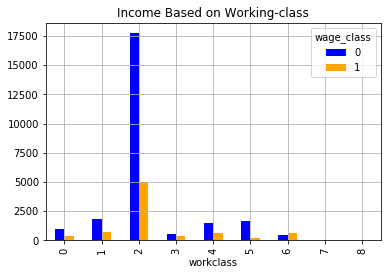

In [39]:
workclassincome = pd.crosstab(train_set['workclass'], train_set['wage_class'])
workclassincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on Working-class')

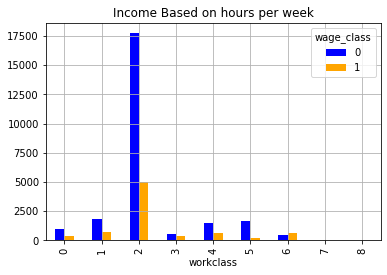

In [40]:
hrsperweekincome = pd.crosstab(train_set['workclass'], train_set['wage_class'])
hrsperweekincome .plot(kind = 'bar', color = ['blue','orange'], grid = True, title = 'Income Based on hours per week')

In [41]:
train_set.dtypes

age               int64
workclass         int32
fnlwgt            int64
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int64
hours_per_week    int64
native_country    int32
wage_class        int32
dtype: object

In [42]:
y= train_set['wage_class']
x=train_set.drop('wage_class', axis=1)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [44]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=400)

In [45]:
model = XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.8932958932958933

In [47]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8362166035418159

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200,300]   
}

In [49]:
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)

In [50]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.821, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.833, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.830, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.830, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.824, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[20:06:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.836, total=   1.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[20:06:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=0.831, total=   3.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[20:06:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=0.830, total=   1.4s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 .................
[20:07:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=0.838, total=   1.3s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 .................
[20:07:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=10, n_estimators=10, score=0.838, total=   0.5s
[CV]  learning_rate=1, max_depth=10, n_estimators=10 .................
[20:08:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=10, score=0.841, total=   0.5s
[CV]  learning_rate=1, max_depth=10, n_estimators=10 .................
[20:08:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.827, total=   4.8s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[20:08:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.817, total=   5.8s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[20:09:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.817, total=   2.2s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[20:09:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.818, total=   2.3s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[20:10:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=1, max_depth=20, n_estimators=300, score=0.815, total=  12.8s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[20:12:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.821, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[20:12:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.838, total=   1.0s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[20:12:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.833, total=   2.6s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[20:12:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.836, total=   0.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[20:12:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.831, total=   0.8s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[20:12:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.832, total=   2.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[20:13:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=0.823, total=   3.9s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[20:13:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=10, n_estimators=50, score=0.827, total=   1.2s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[20:13:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=100, score=0.819, total=   2.4s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[20:13:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are 

[CV]   learning_rate=0.5, max_depth=10, n_estimators=300, score=0.820, total=   7.0s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[20:14:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.817, total=   0.5s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[20:14:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are 

[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.817, total=   4.4s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[20:15:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.813, total=   8.4s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[20:15:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.835, total=   0.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[20:17:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.845, total=   0.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[20:17:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=0.831, total=   2.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[20:17:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=0.841, total=   2.9s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[20:17:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.830, total=   1.3s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[20:17:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.838, total=   1.4s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[20:17:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.828, total=   0.3s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[20:18:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.838, total=   0.3s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[20:18:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.817, total=   5.0s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[20:18:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.819, total=   5.2s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[20:19:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.818, total=   2.3s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[20:20:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.824, total=   2.6s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[20:20:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=20, n_estimators=300, score=0.813, total=  12.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=300 ..............
[20:21:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=300, score=0.821, total=  11.8s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=300 ..............
[20:21:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.835, total=   0.8s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[20:22:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.844, total=   0.8s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[20:22:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are


[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.837, total=   0.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[20:22:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.839, total=   0.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[20:22:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are 

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.835, total=   2.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[20:23:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.835, total=   2.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[20:23:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=0.830, total=   1.2s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 ..............
[20:23:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=0.838, total=   1.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 ..............
[20:23:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=10, n_estimators=300, score=0.815, total=   7.5s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=300 .............
[20:24:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=300, score=0.821, total=   6.9s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=300 .............
[20:24:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.01, max_depth=20, n_estimators=100, score=0.820, total=   4.3s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100 .............
[20:25:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=20, n_estimators=100, score=0.817, total=   4.3s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100 .............
[20:25:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.833, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[20:27:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.830, total=   0.2s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[20:27:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.843, total=   1.6s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[20:27:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.840, total=   1.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[20:27:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.839, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[20:27:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.841, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[20:27:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.832, total=   3.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[20:28:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=0.834, total=   5.2s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=300 .............
[20:28:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.826, total=   2.4s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[20:28:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=100, score=0.830, total=   2.4s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100 ............
[20:28:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.829, total=   0.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[20:29:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.824, total=   0.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[20:29:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.823, total=   8.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[20:30:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.817, total=   8.2s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[20:30:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 25.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [51]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [52]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 100)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.8293581738151294